Yritetään tehdä jonkinlainen web scraper etsimällä dataa sallitulta sivulta. Sallitut sivut voi nähdä kirjoittamalla '/robots.txt' sivuston URL:n perään. Google sallii raapimisen esimerkiksi heidän työpaikkasivultaan.

Esimerkki Googlen työpaikkasivusta:
- Laitetaan hakuun pelkkä Suomi
- Haetaan kaikki tittelit käyttämällä oikeaa luokkaa (luokan nimi piti kuitenkin löytää tutkimalla sivun HTML-koodia)
- Luodaan titteleistä data frame

In [44]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# Tehdään pyyntö halutulle sivustolle
response = requests.get('https://www.google.com/about/careers/applications/jobs/results/?location=Finland')

# Parsitaan vastaus BeautifulSoupin avulla
soup = BeautifulSoup(response.text, 'html.parser')

# Otetaan vastauksesta halutut tiedot, eli nyt tietyn luokan arvot
jobs_finland = soup.find_all('h3', class_='QJPWVe')

# (Ylimääräinen) tulostus, jotta nähdään, millaista dataa saimme
for link in jobs_finland:
    print(link.text)

# Lisätään arvot dataframeen
df_finland = pd.DataFrame({'Job Title': jobs_finland})

Business Program Manager, Global Data Centers
Database Migration Customer Engineer, Google Cloud
Technical Program Manager III, Data Center Construction
Data Center Technician


Sama luokan nimi on kuitenkin kaikilla titteleillä, joten voimme hakea samalla tavalla vaikka Ruotsin avoimet työpaikat:

In [48]:
response = requests.get('https://www.google.com/about/careers/applications/jobs/results/?location=Sweden')

soup = BeautifulSoup(response.text, 'html.parser')

jobs_sweden = soup.find_all('h3', class_='QJPWVe')

df_sweden = pd.DataFrame({'Job Title': jobs_sweden})

Lisätään dataframeihin maiden nimet, jotta voimme yhdistää ne yhdeksi dataframeksi:

In [49]:
df_sweden['Country'] = 'Sweden'
df_finland['Country'] = 'Finland'

df_combined = pd.concat([df_sweden, df_finland])

Sitten piirretään visualisointi:
- Avoimien työpaikkojen määrä per maa

<Axes: xlabel='Country', ylabel='Number of open positions'>

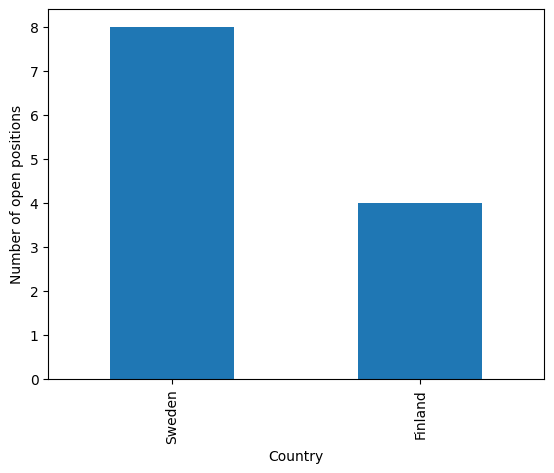

In [51]:
df_combined['Country'].value_counts().plot(kind='bar', ylabel='Number of open positions')